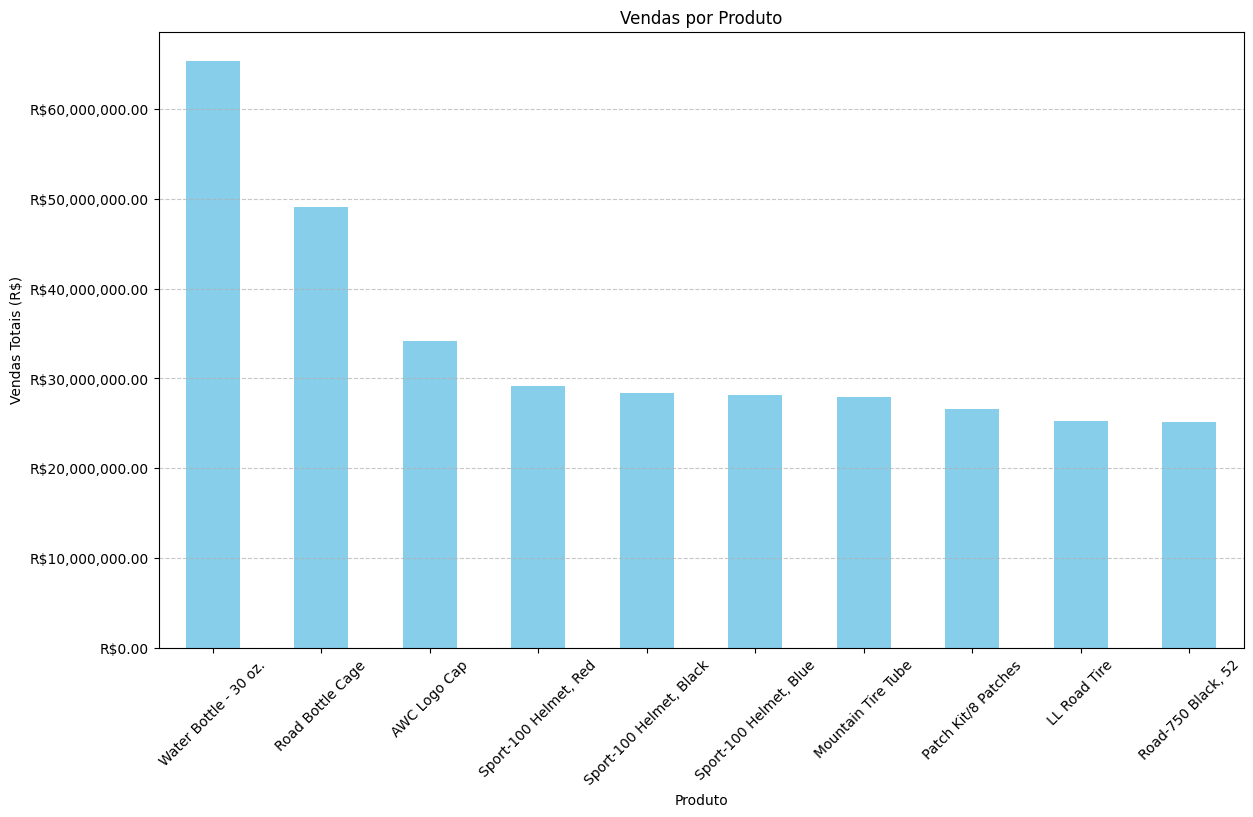

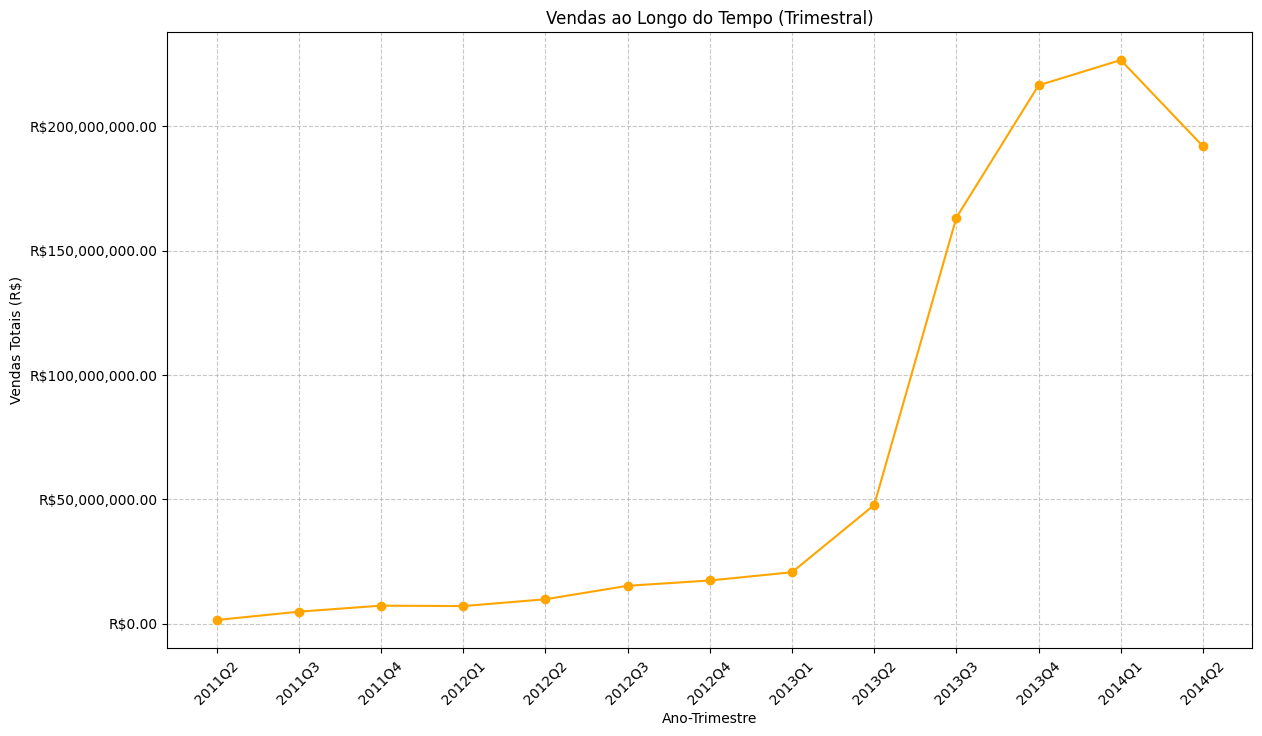

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Carregar dados
df = pd.read_csv("hex.csv", sep=';')
df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')
df['TOTAL_DEVIDO'] = pd.to_numeric(df['TOTAL_DEVIDO'].str.replace('R$', '').str.replace(',', '').str.strip(), errors='coerce')

# Gráfico de Barras - Vendas por Produto
vendas_por_produto = df.groupby('PRODUTO')['TOTAL_DEVIDO'].sum().nlargest(10)  # 10 produtos com mais vendas

plt.figure(figsize=(14, 8))
vendas_por_produto.plot(kind='bar', color='skyblue')
plt.title("Vendas por Produto")
plt.xlabel("Produto")
plt.ylabel("Vendas Totais (R$)")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('R${x:,.2f}'))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de Linhas - Vendas ao Longo do Tempo
df['ANO_TRIMESTRE'] = df['DATA'].dt.to_period('Q')
vendas_por_trimestre = df.groupby('ANO_TRIMESTRE')['TOTAL_DEVIDO'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(vendas_por_trimestre['ANO_TRIMESTRE'].astype(str), vendas_por_trimestre['TOTAL_DEVIDO'], marker='o', color='orange')
plt.title("Vendas ao Longo do Tempo (Trimestral)")
plt.xlabel("Ano-Trimestre")
plt.ylabel("Vendas Totais (R$)")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('R${x:,.2f}'))
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()
